In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns


In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['grid.linewidth']=0.01
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Arial']
#plt.rcParams['font.sans-serif']=['Helvetica']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
#plt.rcParams['legend.columnspacing']=2
plt.rcParams['legend.handlelength']=0.7
plt.rcParams['legend.handletextpad']=0.5
plt.rcParams['legend.frameon']=False
plt.rcParams['legend.framealpha']=0
plt.rcParams['figure.dpi']=100
plt.rcParams['errorbar.capsize']=2
plt.rcParams['lines.markeredgewidth']=1

In [3]:
pair_df = pd.read_csv('../sessions_category_match/KR62186_selfie_data_10611/app/noise_results.csv', index_col=0)
sym_df = pd.read_csv('../sessions_category_match/KR62186_selfie_data_10612/app/noise_results.csv', index_col=0)

pair_df.shape[0]

50000

In [4]:
e = 50
loss_col = 'loss_' + str(e)
var_col = 'var_' + str(e)

noise_df = pair_df[pair_df['is_noise'] == 1]
other_df = pair_df[pair_df['is_noise'] == 0]
print('# of pair noise samples: ', noise_df.shape)

l_po = other_df[loss_col]
l_pn = noise_df[loss_col]
v_po = other_df[var_col]
v_pn = noise_df[var_col]


noise_df = sym_df[sym_df['is_noise'] == 1]
other_df = sym_df[sym_df['is_noise'] == 0]
print('# of symmetry noise samples: ', noise_df.shape)

l_so = other_df[loss_col]
l_sn = noise_df[loss_col]
v_so = other_df[var_col]
v_sn = noise_df[var_col]

# of pair noise samples:  (19996, 401)
# of symmetry noise samples:  (19805, 401)


In [40]:
np.ones_like(v_sn) / float(len(v_sn))

array([5.04922999e-05, 5.04922999e-05, 5.04922999e-05, ...,
       5.04922999e-05, 5.04922999e-05, 5.04922999e-05])

In [44]:
def plot_dist(gs, other, noise, value='loss', title='pair', bins=50, xlim=[-0.3, 10]):
    if title == 'pair':
        v_loc = 0
    else:
        v_loc = 1
        
#     if value == 'Variance':
#         plt.yscale('log')
        
    label = ['clean', 'noise']
    
    plt.subplot(gs[0, v_loc])
    weights = np.ones_like(other)/float(len(other))
    plt.hist(other, histtype='stepfilled', bins=bins, alpha=0.7, label=label[0], edgecolor='w',
             facecolor='cornflowerblue', weights=weights)
    
    weights = np.ones_like(noise)/float(len(noise))
    plt.hist(noise, histtype='stepfilled', bins=bins, alpha=0.7, label=label[1], edgecolor='w', 
             facecolor='gray', weights=weights)
    plt.ylabel('Density')
    plt.xticks(visible=False)
    plt.legend(loc='best')
    #plt.grid(True, axis='y', color='gray', linestyle='dotted')
    #plt.grid(False, axis='x')
    #plt.title(title, fontweight='bold', fontsize='x-large', loc='left')
    plt.xlim(xlim)
    
    plt.subplot(gs[1, v_loc])
    boxdata = [noise, other]
    color=['gray','cornflowerblue']
    bp = plt.boxplot(boxdata, vert=False, widths=0.6, patch_artist=True, sym='k+', notch=True)
    [ median.set(color='none', linewidth=1) for median in bp['medians'] ]
    [ flier.set(marker='', alpha=0.9, linewidth=0.1, color='gray') for flier in bp['fliers'] ]
    [ patch.set_facecolor(c) for patch, c in zip(bp['boxes'], color) ]
    plt.xlabel(value)
    plt.xlim(xlim)
    plt.yticks(range(1,3), ['Noise','Clean'] )
    
plot_dist(gs, other=l_po, noise=l_pn, value='Loss', title='pair', bins=45, xlim=[-0.3, 10])


In [45]:
e

50

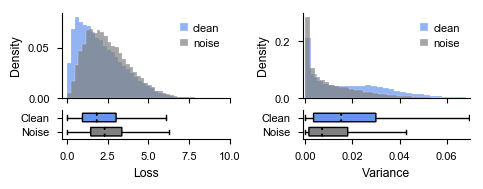

In [48]:
fig=plt.figure(figsize=(5, 2))
gs = gridspec.GridSpec(2,2,height_ratios=[6,2], width_ratios=[3,3])

plot_dist(gs, other=l_po, noise=l_pn, value='Loss', title='pair', bins=45, xlim=[-0.3, 10])
plot_dist(gs, other=v_po, noise=v_pn, value='Variance', title='s', bins=50, xlim=[-0.001, 0.07])

# plot_dist(gs, other=v_po, noise=v_pn, value='Loss', title='pair', xlim=[-0.3, 10])
# plot_dist(gs, other=v_so, noise=v_sn, value='Loss', title='symmetry', xlim=[-0.3, 10])

plt.tight_layout(h_pad=0.2, w_pad=1.5)
plt.savefig('4_pair_density_50.pdf', bbox_inches='tight', pad_inches=0.05)


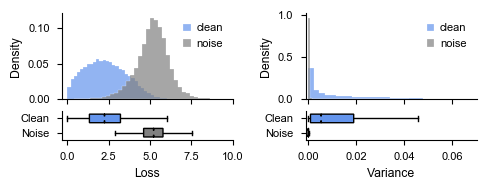

In [49]:
fig=plt.figure(figsize=(5, 2))
gs = gridspec.GridSpec(2,2,height_ratios=[6,2], width_ratios=[3,3])

plot_dist(gs, other=l_so, noise=l_sn, value='Loss', title='pair', bins=45, xlim=[-0.3, 10])

plot_dist(gs, other=v_so, noise=v_sn, value='Variance', title='symmetry', bins=50, xlim=[-0.001, .07])

plt.tight_layout(h_pad=0.2, w_pad=1.5)
plt.savefig('4_symmetry_density_50.pdf', bbox_inches='tight', pad_inches=0.05)
